## Make Regional Masks and Check Them:

In [1]:
%matplotlib inline
import os
import importlib
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import pop_tools 

import util
import shutil

Cannot write to data cache folder '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


In [2]:
#make masks on grid:
grid_name = 'POP_gx1v7'
grid = pop_tools.get_grid(grid_name)

In [3]:
# Set it up:
lat = grid.TLAT
lon = grid.TLONG

In [21]:
rmask = xr.DataArray(np.ones(5), dims='region') * grid.TAREA
rmask[0, :, :] = grid.TAREA.where((lat <= -45) & (grid.REGION_MASK == 1)).fillna(0.) #Southern Ocean
rmask[1, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 270) | (lon <= 0)) & (grid.REGION_MASK == 1)).fillna(0.) # ATLANTIC
rmask[2, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 55) & (lon <= 145)) & (grid.REGION_MASK == 1)).fillna(0.) # INDIAN
rmask[3, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 145) & (lon <= 245)) & (grid.REGION_MASK == 1)).fillna(0.) # WEST PACIFIC
rmask[4, :, :] = grid.TAREA.where((lat <= -45) & ((lon >= 245) & (lon <= 298)) & (grid.REGION_MASK == 1)).fillna(0.) # EAST PACIFIC

In [27]:
atl_mask = grid.TAREA.where((lat <= -45) & ((lon > 270) | (lon <= 0)) & (grid.REGION_MASK == 1)).fillna(0.) # ATLANTIC
ind_mask = grid.TAREA.where((lat <= -45) & ((lon > 55) & (lon <= 145)) & (grid.REGION_MASK == 1)).fillna(0.) # INDIAN
wpac_mask = grid.TAREA.where((lat <= -45) & ((lon > 145) & (lon <= 245)) & (grid.REGION_MASK == 1)).fillna(0.) # WEST PACIFIC
epac_mask = grid.TAREA.where((lat <= -45) & ((lon >= 245) & (lon <= 298)) & (grid.REGION_MASK == 1)).fillna(0.) # EAST PACIFIC
SO_mask = grid.TAREA.where((lat <= -45) & (grid.REGION_MASK == 1)).fillna(0.) #Southern Ocean

In [28]:
#Polar Plotting Solution:

threshold = 1.0
atl_mask_filtered = atl_mask.values.copy()
atl_mask_filtered[atl_mask_filtered < threshold] = np.nan

threshold = 1.0
ind_mask_filtered = ind_mask.values.copy()
ind_mask_filtered[ind_mask_filtered < threshold] = np.nan

threshold = 1.0
wpac_mask_filtered = wpac_mask.values.copy()
wpac_mask_filtered[wpac_mask_filtered < threshold] = np.nan

threshold = 1.0
epac_mask_filtered = epac_mask.values.copy()
epac_mask_filtered[epac_mask_filtered < threshold] = np.nan


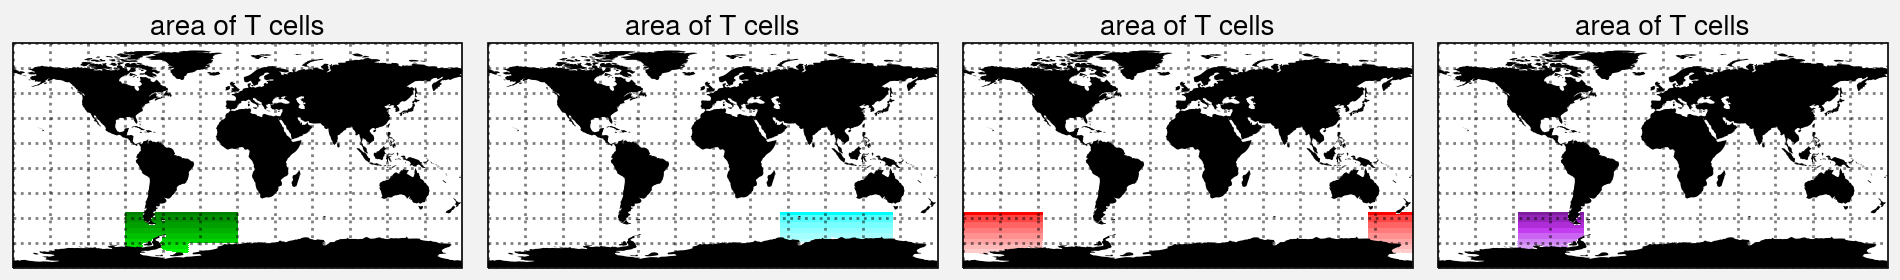

In [29]:
import proplot as plot

f, axs = plot.subplots(ncols=4, proj = 'pcarree')
axs[0].pcolormesh(lon, lat, atl_mask, cmap='green')
axs[1].pcolormesh(lon, lat, ind_mask, cmap='cyan')
axs[2].pcolormesh(lon, lat, wpac_mask, cmap='red')
axs[3].pcolormesh(lon, lat, epac_mask, cmap='purple')
axs.format(land = True)

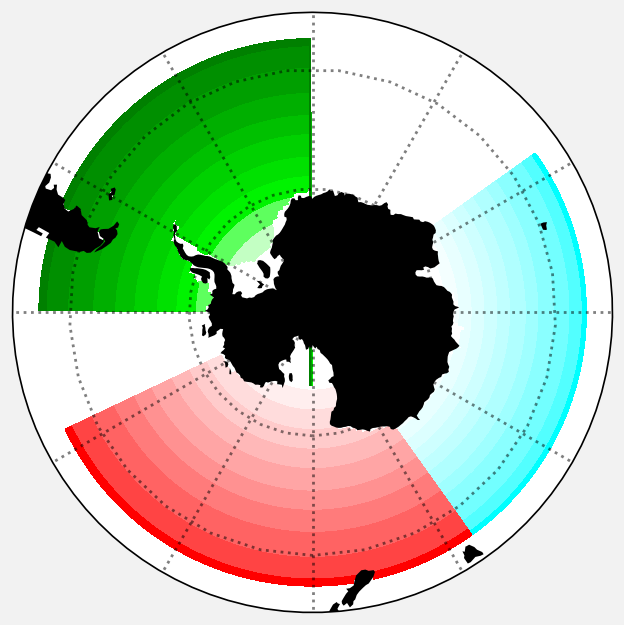

In [30]:
#Polar Plot:

f, axs = plot.subplots(ncols=1, proj = 'splaea', axwidth=3)

axs.pcolormesh(lon, lat, atl_mask_filtered, cmap='green', label = 'Atlantic')
axs.pcolormesh(lon, lat, ind_mask_filtered, cmap='cyan', label = 'Indian')
axs.pcolormesh(lon, lat, wpac_mask_filtered, cmap='red', label = 'West Pacific')
#axs.pcolormesh(lon, lat, epac_mask_filtered, cmap='purple',label = 'East Pacific')

axs.format(boundinglat=-40, land = True)

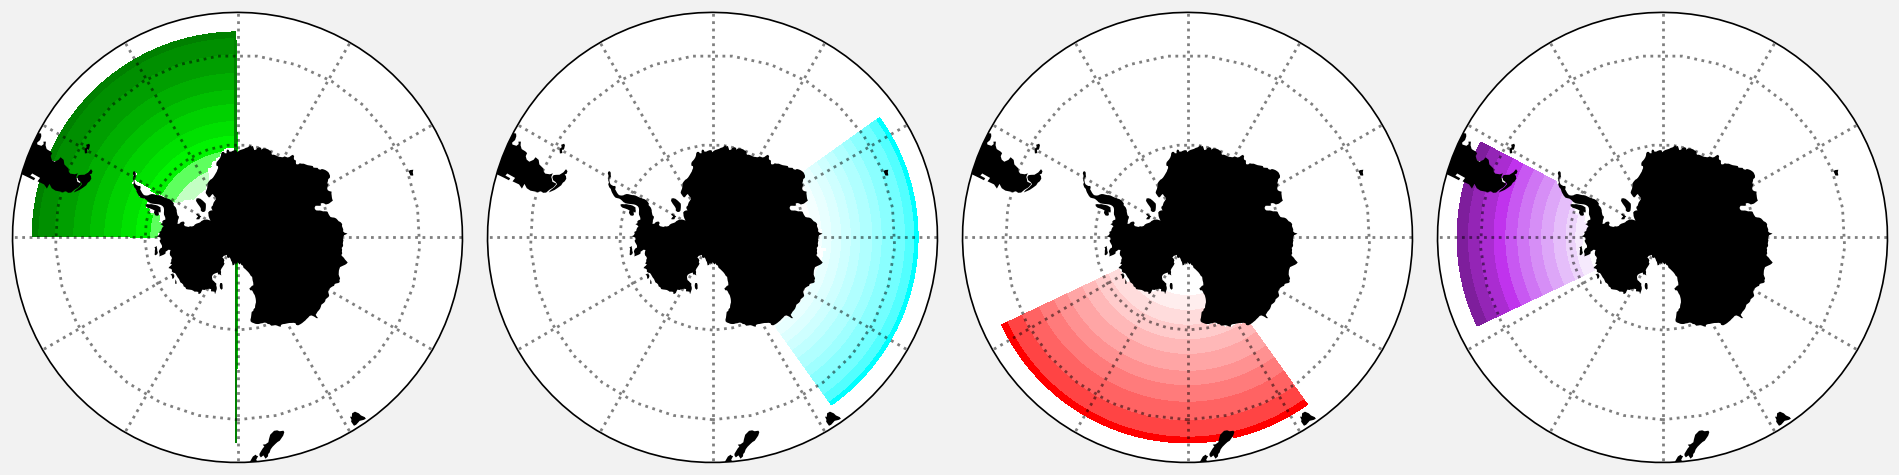

In [31]:
# Using zoom into polar projection example from: 
# https://proplot.readthedocs.io/en/latest/projection.html

f, axs = plot.subplots(ncols=4, proj = 'splaea')

axs[0].pcolormesh(lon, lat, atl_mask_filtered, cmap='green')
axs[1].pcolormesh(lon, lat, ind_mask_filtered, cmap='cyan')
axs[2].pcolormesh(lon, lat, wpac_mask_filtered, cmap='red')
axs[3].pcolormesh(lon, lat, epac_mask_filtered, cmap='purple')

axs.format(boundinglat=-40, land = True)

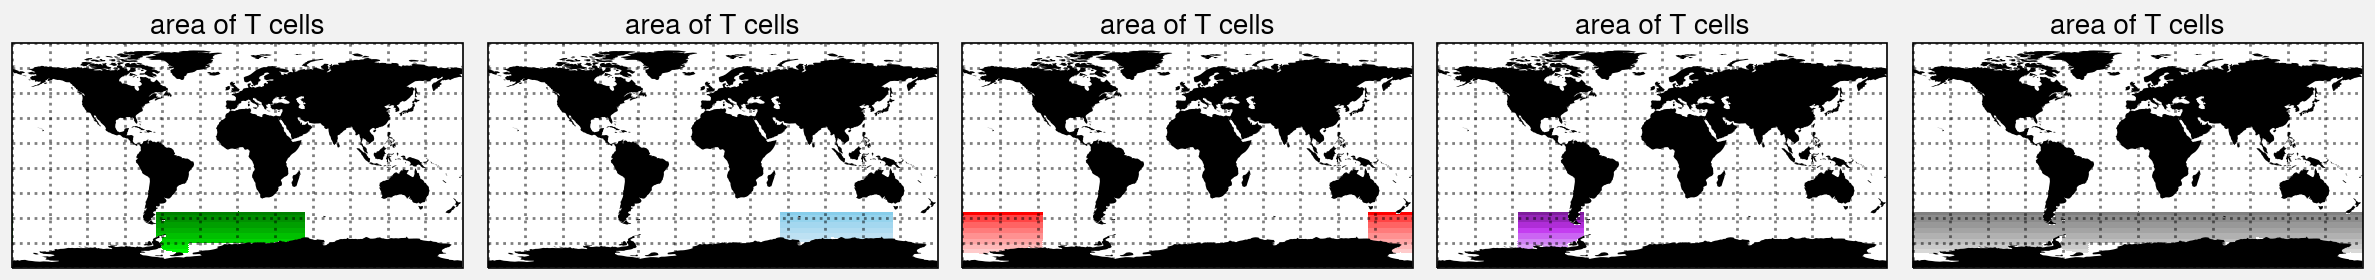

In [5]:
import pop_tools 
import proplot as plot

#make masks on grid:
grid_name = 'POP_gx1v7'
grid = pop_tools.get_grid(grid_name)

# Set up lat lon data:
lat = grid.TLAT
lon = grid.TLONG

# Mask out rectangles:
atl_mask = grid.TAREA.where((lat <= -45) & ((lon > 295) | (lon <= 55)) & (grid.REGION_MASK == 1)).fillna(0.) # ATLANTIC
ind_mask = grid.TAREA.where((lat <= -45) & ((lon > 55) & (lon <= 145)) & (grid.REGION_MASK == 1)).fillna(0.) # INDIAN
wpac_mask = grid.TAREA.where((lat <= -45) & ((lon > 145) & (lon <= 245)) & (grid.REGION_MASK == 1)).fillna(0.) # WEST PACIFIC
epac_mask = grid.TAREA.where((lat <= -45) & ((lon >= 245) & (lon <= 298)) & (grid.REGION_MASK == 1)).fillna(0.) # EAST PACIFIC
SO_mask = grid.TAREA.where((lat <= -45) & (grid.REGION_MASK == 1)).fillna(0.) #Southern Ocean

#Plot
f, axs = plot.subplots(ncols=5, proj = 'pcarree')
axs[0].pcolormesh(lon, lat, atl_mask, cmap='green')
axs[1].pcolormesh(lon, lat, ind_mask, cmap='skyblue')
axs[2].pcolormesh(lon, lat, wpac_mask, cmap='red')
axs[3].pcolormesh(lon, lat, epac_mask, cmap='purple')
axs[4].pcolormesh(lon, lat, SO_mask, cmap='grey')
axs.format(land = True)

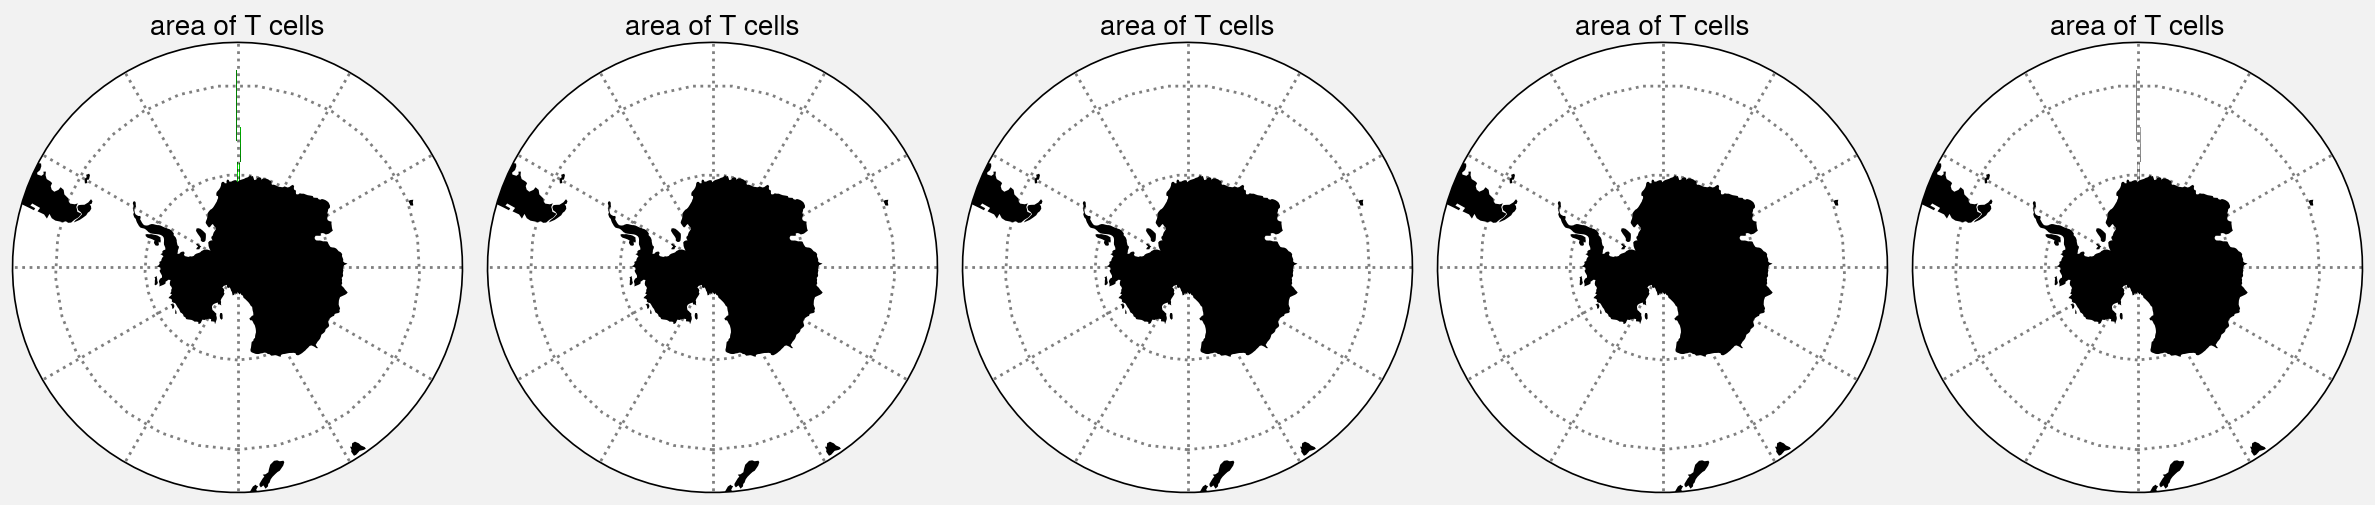

In [6]:
#Plot in South Pole Projection
f, axs = plot.subplots(ncols=5, proj = 'splaea')
axs[0].pcolormesh(lon, lat, atl_mask, cmap='green')
axs[1].pcolormesh(lon, lat, ind_mask, cmap='skyblue')
axs[2].pcolormesh(lon, lat, wpac_mask, cmap='red')
axs[3].pcolormesh(lon, lat, epac_mask, cmap='purple')
axs[4].pcolormesh(lon, lat, SO_mask, cmap='grey')
axs.format(land = True, boundinglat=-40)

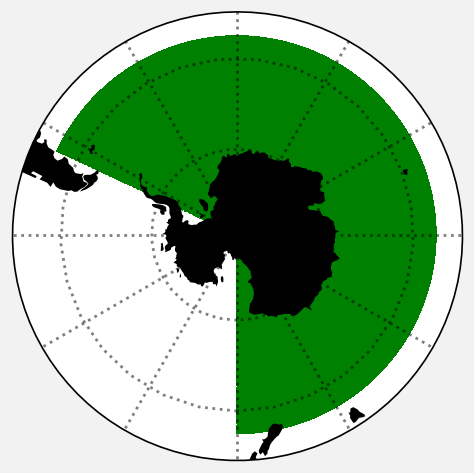

In [7]:
#Example that 180x360 works:
import xesmf as xe

ds = xe.util.grid_global(1, 1)

conditions = (ds.lat <= -45) & ((ds.lon > -65) | (ds.lon >= 85))



f, ax = plot.subplots(proj='spstere')
ax.pcolormesh(ds.lon, ds.lat, conditions, cmap='green')
ax.format(boundinglat=-40, land=True)

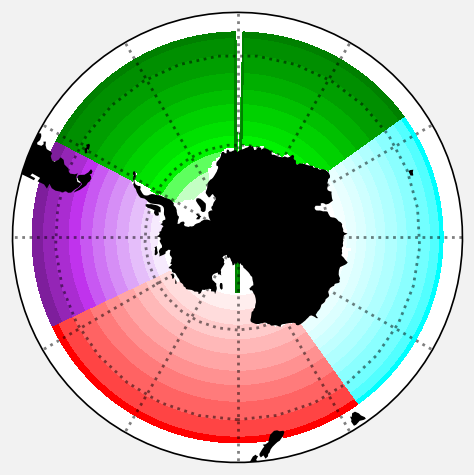